# 1. Data Importing

In [55]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [56]:
ticker = yf.Ticker("RELIANCE.NS")
hist = ticker.history(period="max")
print(hist.index.min(),hist.index.max())

1996-01-01 00:00:00+05:30 2025-09-26 00:00:00+05:30


In [57]:
df=yf.download("RELIANCE.NS",period="max",auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [58]:
print("Raw Data",df.shape)
df.sample(5)

Raw Data (7467, 6)


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
2022-09-14,1181.572998,1194.523071,1204.514526,1187.323730,1188.362061,8678219
2018-04-02,394.443695,408.226685,411.884033,405.277985,408.249542,12494499
2017-06-08,291.806885,304.404205,307.398651,303.569885,306.301453,7903123
2011-01-11,207.566696,231.726196,239.715179,228.263168,237.726501,21147094
2021-02-15,921.644409,938.044556,951.289612,934.537170,945.174744,15791099


# 2. Data Preprocessing

In [59]:
df=df.reset_index()
df.columns

MultiIndex([(     'Date',            ''),
            ('Adj Close', 'RELIANCE.NS'),
            (    'Close', 'RELIANCE.NS'),
            (     'High', 'RELIANCE.NS'),
            (      'Low', 'RELIANCE.NS'),
            (     'Open', 'RELIANCE.NS'),
            (   'Volume', 'RELIANCE.NS')],
           names=['Price', 'Ticker'])

In [60]:
df.columns=['Date','Adj Close','Close','High','Low','Open','Volume']
df.sample(5)

,Date,Adj Close,Close,High,Low,Open,Volume
1538,2001-11-22,16.050314,20.843437,21.307577,20.714907,21.064796,31503531
2404,2005-03-28,33.968410,40.422989,40.937111,40.094521,40.130222,56543733
2031,2003-10-15,28.143114,34.178524,34.482002,33.300228,33.500168,89588449
6583,2022-03-03,1082.155151,1097.585083,1114.452881,1093.777710,1107.599609,10186748
1052,2000-01-12,15.875394,21.543217,21.778856,20.147228,20.636360,169586471


In [61]:
beginning_cols=['Date','Open','Close','Adj Close']
later_cols=[c for c in df.columns if c not in beginning_cols]
df=df[beginning_cols+later_cols]

In [62]:
df.sample(5)

,Date,Open,Close,Adj Close,High,Low,Volume
5434,2017-07-10,341.754700,341.240387,327.118652,343.080505,340.383209,3504540
3133,2008-02-27,297.729584,295.838074,259.973572,301.501221,293.735107,23321593
7218,2024-09-30,1519.400024,1476.574951,1470.701172,1524.974976,1474.400024,27008814
7037,2024-01-03,1305.000000,1291.650024,1282.160156,1317.000000,1288.599976,9037536
6275,2020-12-04,908.693176,898.424805,882.717285,908.693176,895.309692,18464552


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467 entries, 0 to 7466
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7467 non-null   datetime64[ns]
 1   Open       7467 non-null   float64       
 2   Close      7467 non-null   float64       
 3   Adj Close  7467 non-null   float64       
 4   High       7467 non-null   float64       
 5   Low        7467 non-null   float64       
 6   Volume     7467 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 408.5 KB


In [64]:
df.describe()

,Date,Open,Close,Adj Close,High,Low,Volume
count,7467,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000,7.467000e+03
mean,2010-09-11 13:09:31.313780736,346.964605,346.698458,334.571114,350.734280,342.948274,5.846928e+07
min,1996-01-01 00:00:00,5.462565,5.487558,3.449042,5.487558,5.428648,0.000000e+00
25%,2003-02-25 12:00:00,25.600868,25.565166,19.643961,26.007883,25.170647,1.339303e+07
50%,2010-08-12 00:00:00,199.553116,199.313095,183.162903,201.838943,196.827255,2.360792e+07
75%,2018-03-08 12:00:00,426.707657,426.159042,411.770615,430.936447,422.181702,6.082384e+07
max,2025-09-26 00:00:00,1604.449951,1600.900024,1589.138184,1608.800049,1585.500000,1.448889e+09
std,NaN,423.736545,423.511546,422.413069,427.586892,419.709043,1.012907e+08


Text(0, 0.5, 'Adj Close Price')

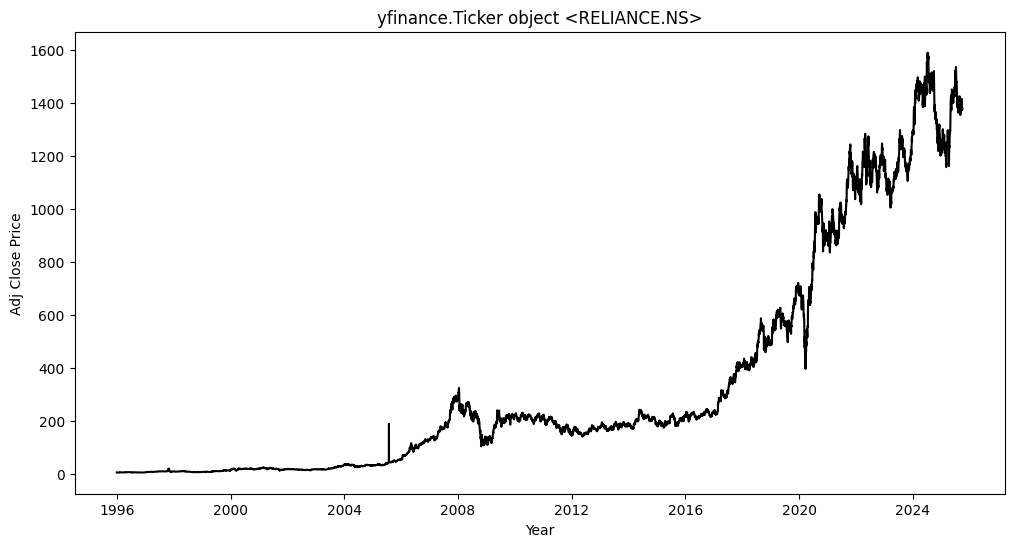

In [67]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Adj Close'],c='black')
plt.title(ticker)
plt.xlabel("Year")
plt.ylabel("Adj Close Price")

In [136]:
df_sample=df.copy()

# 3. Feature Engineering

#### 1. MACD
#### 2. RSI
#### 3. Daily % Return
#### 4. MA's

In [141]:
# Calculate MACD
 
          #short_term = 12
          #long_term = 26
          #signal_period = 9

# Calculate short-term and long-term EMAs

          #short_ema = df['Close'].ewm(span=short_term, adjust=False).mean()
          #long_ema = df['Close'].ewm(span=long_term, adjust=False).mean()

# Calculate MACD Line

          #macd_line = short_ema - long_ema

# Calculate Signal Line

          #signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()

# Calculate MACD Histogram

          #macd_histogram = macd_line - signal_line

# Add MACD components to the DataFrame

          #df['MACD'] = macd_line
          #df['Signal'] = signal_line
          #df['Histogram'] = macd_histogram

In [ ]:
from ta.trend import MACD
from ta.momentum import RSIIndicator
# 1. MACD
# adds MACD Line,Signal Line and MACD histogram
macd_indicator=MACD(close=df_sample['Adj Close'],window_fast=12,window_slow=26,window_sign=9,fillna=False)

df_sample['MACD_Line']=macd_indicator.macd()
df_sample['MACD_Signal']=macd_indicator.macd_signal()
df_sample['MACD_Histogram']=macd_indicator.macd_diff()

In [ ]:
# 2. RSI
rsi_indicator=RSIIndicator(close=df_sample['Adj Close'],window=14,fillna=False)

df_sample['RSI_14']=rsi_indicator.rsi()

In [139]:
df_sample.sample(9)

,Date,Open,Close,Adj Close,High,Low,Volume,MACD_Line,MACD_Signal,MACD_Histogram,RSI_14
2089,2004-01-05,41.772564,41.419102,34.105114,42.122452,40.844284,85438299,1.402922,1.065879,0.337042,76.858880
5209,2016-08-09,234.754929,235.600677,225.850693,236.469299,233.383423,13290768,1.714893,1.732411,-0.017518,60.418369
4794,2014-12-03,219.108398,221.348526,207.215164,222.640015,219.108398,9789854,0.285948,0.864910,-0.578963,46.853289
7099,2024-04-05,1460.875000,1460.099976,1449.372437,1470.800049,1456.000000,7442298,5.459151,5.834672,-0.375521,49.944138
2479,2005-07-12,45.335728,45.578506,39.241486,45.985523,45.025108,71883881,1.010832,1.274553,-0.263721,60.434009
1075,2000-02-14,25.634787,25.142084,18.527435,25.770458,24.992130,71806185,0.993407,1.029550,-0.036143,66.567044
6816,2023-02-08,1067.449097,1085.424561,1073.657227,1089.093506,1064.680176,21160332,-25.920069,-24.649129,-1.270940,37.557377
3394,2009-03-30,173.848938,173.317474,153.108093,175.437592,170.865921,60118929,7.150618,4.178856,2.971762,66.789693
453,1997-09-25,12.103332,12.399667,8.469960,12.442511,12.067629,282614546,-0.059852,-0.066321,0.006469,50.545891


In [ ]:
# 3. Daily % Return
df_sample['Daily % Return']=100*(df_sample['Close']-df_sample['Close'].shift(1))/df_sample['Close'].shift(1)

In [155]:
# 4. MA (Moving Averages)
ma_windows=[10,20,50,100,200]
for w in ma_windows:
    df_sample[f'SMA_{w}']=df_sample['Adj Close'].rolling(window=w).mean()           # SMA features
    df_sample[f'EMA_{w}']=df_sample['Adj Close'].ewm(span=w,adjust=False).mean()    # EMA features

df_sample=df_sample.fillna(0)

In [160]:
df_sample.to_csv('Complete Data.csv')

# 4. EDA

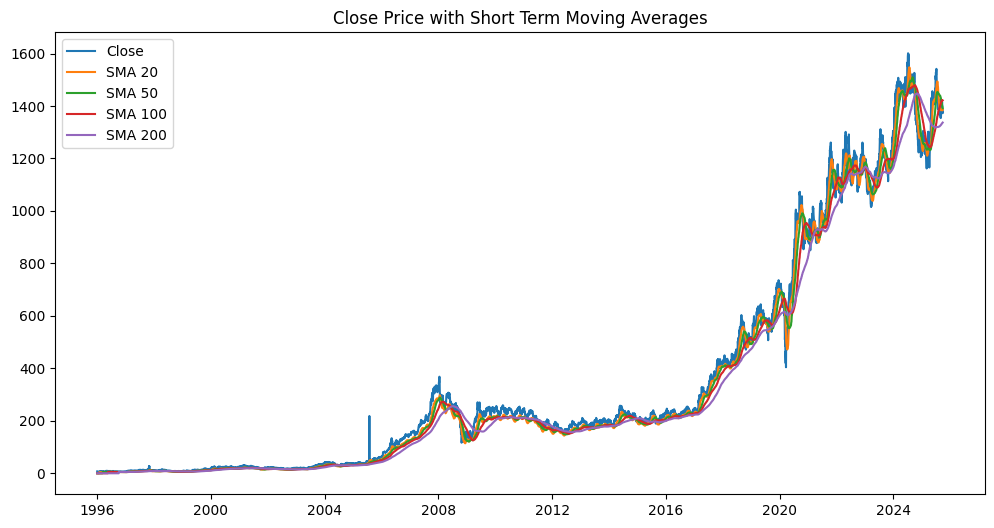

In [178]:
plt.figure(figsize=(12,6))
plt.plot(df_sample['Date'],df_sample['Close'],label='Close')
plt.plot(df_sample['Date'],df_sample['SMA_20'],label='SMA 20')
plt.plot(df_sample['Date'],df_sample['SMA_50'],label='SMA 50')
plt.plot(df_sample['Date'],df_sample['SMA_100'],label='SMA 100')
plt.plot(df_sample['Date'],df_sample['SMA_200'],label='SMA 200')
plt.title("Close Price with Short Term Moving Averages")
plt.legend()

<BarContainer object of 7467 artists>

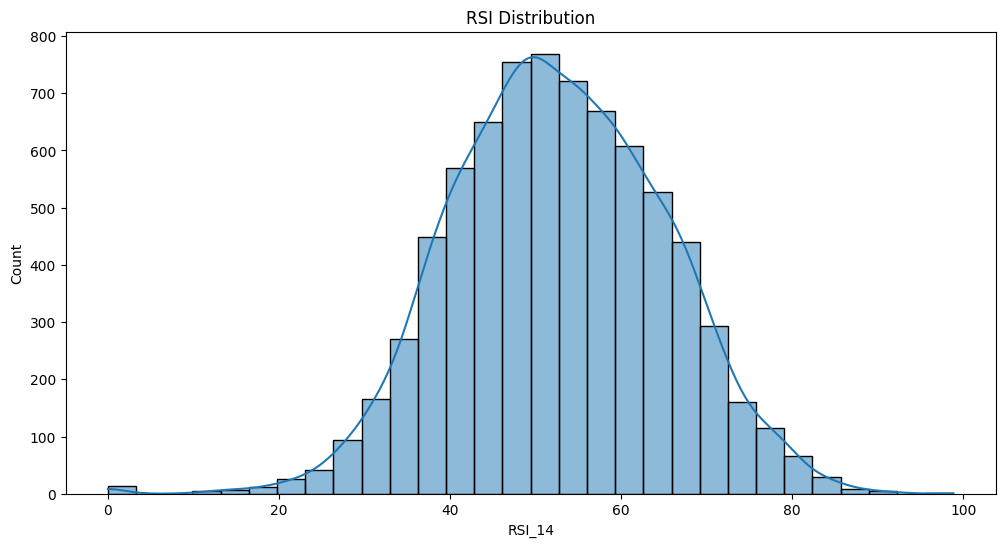

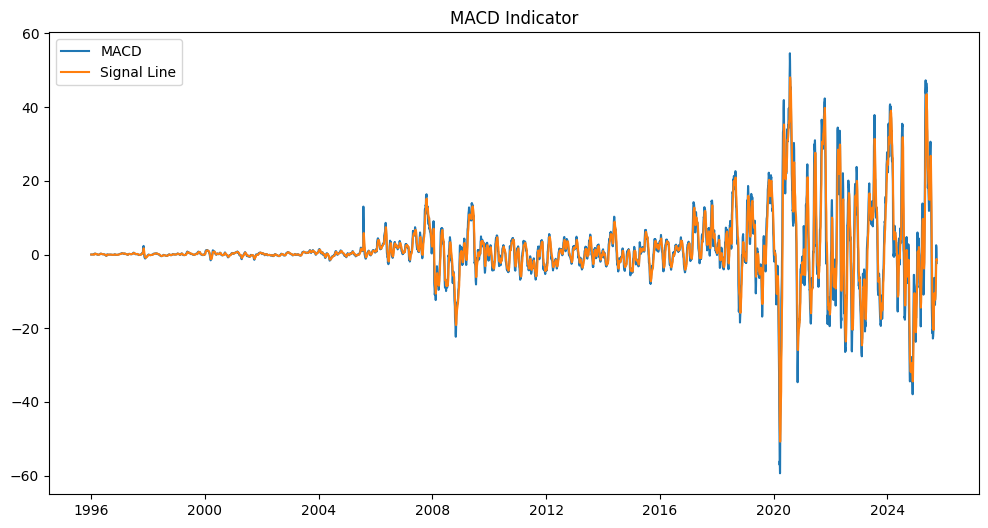

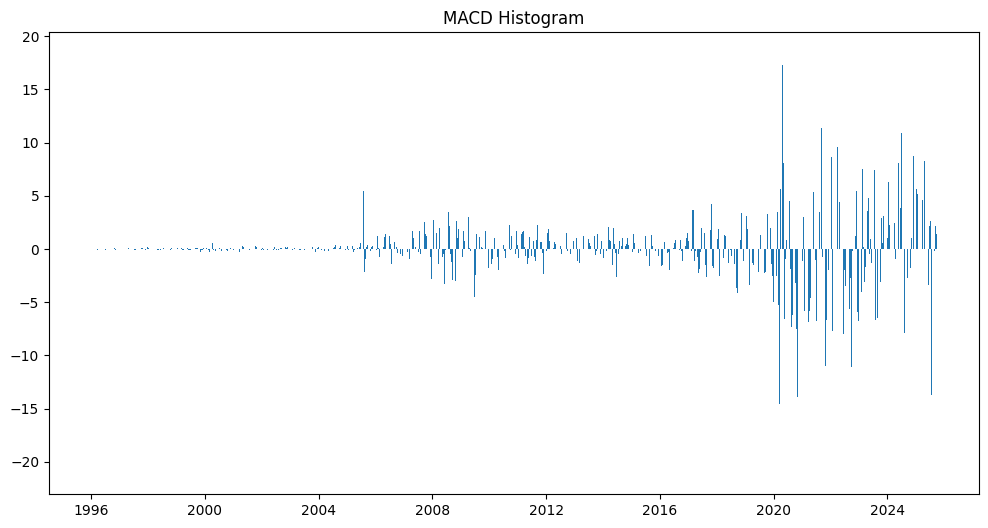

In [177]:
plt.figure(figsize=(12,6))
plt.title("RSI Distribution")
sns.histplot(df_sample['RSI_14'], bins=30, kde=True)

plt.figure(figsize=(12,6))
plt.title("MACD Indicator")
plt.plot(df_sample['Date'],df_sample['MACD_Line'], label='MACD')
plt.plot(df_sample['Date'],df_sample['MACD_Signal'], label='Signal Line')
plt.legend()

plt.figure(figsize=(12,6))
plt.title("MACD Histogram")
plt.bar(df_sample['Date'],df_sample['MACD_Histogram'], label='Histogram')

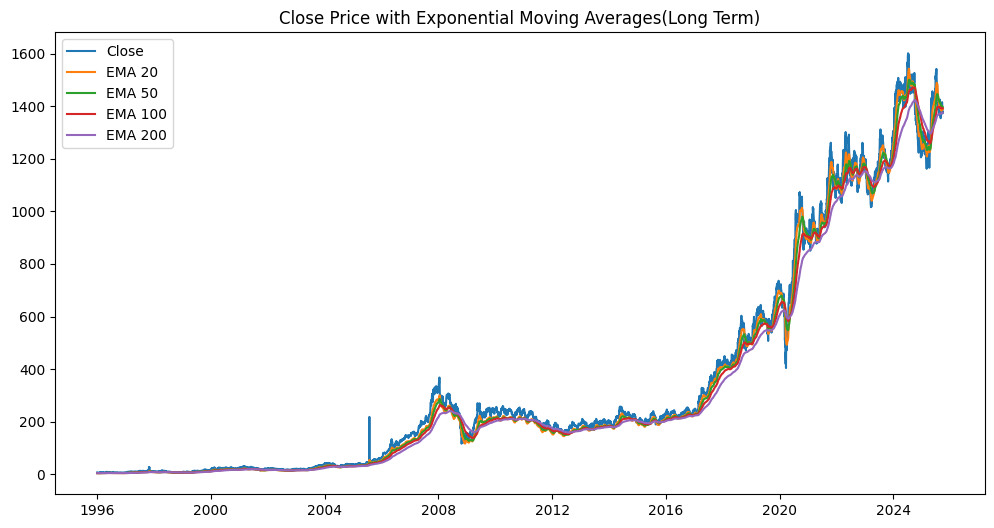

In [179]:
plt.figure(figsize=(12,6))
plt.plot(df_sample['Date'],df_sample['Close'],label='Close')
plt.plot(df_sample['Date'],df_sample['EMA_20'],label='EMA 20')
plt.plot(df_sample['Date'],df_sample['EMA_50'],label='EMA 50')
plt.plot(df_sample['Date'],df_sample['EMA_100'],label='EMA 100')
plt.plot(df_sample['Date'],df_sample['EMA_200'],label='EMA 200')
plt.title("Close Price with Exponential Moving Averages(Long Term)")
plt.legend()